In [1]:
import matplotlib.pyplot as plt
csfont = {'fontname':'Times New Roman'}

In [2]:

def cm2inch(value):
    return value/2.54 

# imports

In [3]:


import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

import sklearn



import pickle
import numpy as np
import pandas as pd
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
import re
import copy

from sklearn import svm
from sklearn.preprocessing import StandardScaler, Normalizer, PolynomialFeatures
from sklearn.feature_selection import chi2, RFE, RFECV
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve, auc
from sklearn.neural_network import MLPClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from scipy.stats import chi2_contingency, chisquare, fisher_exact
from scipy.stats import pearsonr
from scipy.stats import entropy


import sys
sys.path.insert(0, r"C:\Users\ali_m\AnacondaProjects\PhD\Epilepsy_Surgery_Project")
from crosstab.Semiology_Crosstab.Semiology_Crosstab_exclude_files_with_outcome_8 import*
from crosstab.Semiology_Crosstab.main_dataframe import*
from crosstab.Semiology_Crosstab.populate_main_dataframe import*
from crosstab.outcomes import*
from Stats.performance_metrics import *
from Stats.model_performance import *
from Sklearn_and_plots.plot_coefficients_all import plot_coefficients_all






# load pickles


# load all pickled data including dataframes

def openpickle(path_to_file):
    with open(path_to_file, 'rb') as f:
        data = pickle.load(f)
    return data


HS = 'Hippocampal Sclerosis'
ESF = 'Entirely Seizure-Free'


df_HS = openpickle('L:\\word_docs\\NLP\\Data Pickles\\automated\\fixed fully\\updated\\df_HS.pickle')

merged126_pruned = openpickle('L:\\word_docs\\NLP\\Data Pickles\\automated\\fixed fully\\updated\\merged_gold_df_HS_EZ_126_pruned.pickle')
merged_NOTgold_df_HS_EZ_test_set_pruned_183 = openpickle('L:\\word_docs\\NLP\\Data Pickles\\automated\\fixed fully\\updated\\merged_NOTgold_df_HS_EZ_test_set_pruned_183.pickle')




# set all X, y variables

X_gold = merged126_pruned
X = X_gold

semiology = [i for i in X_gold.columns if i not in ['EZ', HS]]  # length = 40
X_S_gold = X_gold[semiology]

semiology_HS = [i for i in X_gold.columns if i not in ['EZ']]  # length = 40
X_HS_gold = X_gold[semiology_HS]


y_EZ_gold = merged126_pruned['EZ']
y = y_EZ_gold

The nltk version is 3.3.
The scikit-learn version is 0.19.2.


In [4]:
y_gold = y_EZ_gold

y_gold_binary = np.zeros((126,))
for i in range(0, len(y_gold)):
    if y_gold.iloc[i] == True:
        y_gold_binary[i] = 1
        

inv_y_gold_binary = np.ones((126,))
for i in range(0, len(y_gold)):
    if y_gold.iloc[i] == True:
        inv_y_gold_binary[i] = 0

# y_gold_binary.sum()

# inv_y_gold_binary.sum()

In [5]:
merged_NOTgold_df_HS_EZ_test_set_pruned_183

,Epigastric,Fear-Anxiety,Psychic,Autonomous-Vegetative,Olfactory-Gustatory,Auditory,Visual,Somatosensory,Vestibular,Non-Specific Aura,...,Grimace,Vocalisation,Aphasia,Dysphasia,Corprolalia,Dialeptic/LOA,LOC,Hippocampal Sclerosis,EZ,AUTOMATISMS
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,True,1
61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,True,0
179,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,True,0
255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,True,1
287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,True,1
312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,True,0
412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,False,1
419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,True,1
426,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,True,1
427,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,True,1


In [6]:
linear_svc = svm.SVC(kernel='linear')

In [7]:
import warnings
warnings.filterwarnings("ignore")


linear_RFECV_acc = RFECV(linear_svc, step=1, cv=StratifiedKFold(5), scoring='accuracy')  
linear_RFECV_balanced = RFECV(linear_svc, step=1, cv=StratifiedKFold(5), scoring='recall_macro') 
linear_RFECV_f1 = RFECV(linear_svc, step=1, cv=StratifiedKFold(5), scoring='f1_macro') 

linear_HS_RFECV_acc = RFECV(linear_svc, step=1, cv=StratifiedKFold(5), scoring='accuracy')  
linear_HS_RFECV_balanced = RFECV(linear_svc, step=1, cv=StratifiedKFold(5), scoring='recall_macro') 
linear_HS_RFECV_f1 = RFECV(linear_svc, step=1, cv=StratifiedKFold(5), scoring='f1_macro') 





linear_RFECV_acc.fit(X_S_gold, y_gold)
linear_RFECV_balanced.fit(X_S_gold, y_gold)
linear_RFECV_f1.fit(X_S_gold, y_gold)

linear_HS_RFECV_acc.fit(X_HS_gold, y_gold)
linear_HS_RFECV_balanced.fit(X_HS_gold, y_gold)
linear_HS_RFECV_f1.fit(X_HS_gold, y_gold)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
   estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
   n_jobs=1, scoring='f1_macro', step=1, verbose=0)

In [8]:
#logistic regression

LR = LogisticRegression()

#RFECV

LR_RFECV_acc = RFECV(LR, step=1, cv=StratifiedKFold(5), scoring='accuracy')  
LR_RFECV_balanced = RFECV(LR, step=1, cv=StratifiedKFold(5), scoring='recall_macro') 
LR_RFECV_f1 = RFECV(LR, step=1, cv=StratifiedKFold(5), scoring='f1_macro') 

LR_HS_RFECV_acc = RFECV(LR, step=1, cv=StratifiedKFold(5), scoring='accuracy') 
LR_HS_RFECV_balanced = RFECV(LR, step=1, cv=StratifiedKFold(5), scoring='recall_macro') 
LR_HS_RFECV_f1 = RFECV(LR, step=1, cv=StratifiedKFold(5), scoring='f1_macro') 






LR_RFECV_acc.fit(X_S_gold, y_gold)
LR_RFECV_balanced.fit(X_S_gold, y_gold)
LR_RFECV_f1.fit(X_S_gold, y_gold)

LR_HS_RFECV_acc.fit(X_HS_gold, y_gold)
LR_HS_RFECV_balanced.fit(X_HS_gold, y_gold)
LR_HS_RFECV_f1.fit(X_HS_gold, y_gold)

# Changed in version 0.22: The default solver changed from ‘liblinear’ to ‘lbfgs’ in 0.22.





best_fx_LR = X_S_gold.columns[LR_RFECV_acc.get_support(indices=True)]
best_fx_LR

LR_RFECV_acc.n_features_

best_fx_LR_HS = X_HS_gold.columns[LR_HS_RFECV_acc.get_support(indices=True)]
best_fx_LR_HS

LR_HS_RFECV_acc.n_features_

25

In [9]:
len(best_fx_LR)


16

# pickle the GB model

In [10]:
import pickle
# pickle dump:

# pickle.dump(model, open(filename, 'wb'))

In [11]:
# pickle load:
filename = r'D:\Ali USB Backup\1 PhD\paper 1\Lancet Neurology\GB_data_pickles_FIXED6.pickle'
GB_RFECV_acc, GB_HS_RFECV_acc, X_S_gold, X_HS_gold = pickle.load(open(filename, 'rb'))

In [12]:
# pickle.dump((GB_RFECV_acc, GB_HS_RFECV_acc, X_S_gold, X_HS_gold), 
#             open(r'D:\Ali USB Backup\1 PhD\paper 1\Lancet Neurology\GB_data_pickles_FIXED6.pickle', 'wb'))

In [13]:
best_GB_fx = X_S_gold.columns[GB_RFECV_acc.get_support(indices=True)]
best_GB_HS_fx = X_HS_gold.columns[GB_HS_RFECV_acc.get_support(indices=True)]

In [14]:
best_fx_svc_lancet = X_S_gold.columns[linear_RFECV_acc.get_support(indices=True)]
best_fx_svc_HS_lancet = X_HS_gold.columns[linear_HS_RFECV_acc.get_support(indices=True)]

# Theil's as model metric for linera SVC SoS+HS and SoS
# and MAthews Coorelation coefficient MCC

In [10]:
import matplotlib.pyplot as plt
csfont = {'fontname':'Times New Roman'}

In [11]:
model_predict = linear_HS_RFECV_acc.estimator_.predict(X_HS_gold[best_fx_svc_HS_lancet])

In [12]:
model_predict[model_predict==False].shape

(10,)

In [29]:
model_predict.shape

NameError: name 'model_predict' is not defined

In [14]:
X_HS_model = copy.deepcopy(merged126_pruned)
X_HS_model['SVC SoS+HS'] = model_predict


In [15]:
X_HS_model.head()

# X_HS_model['SVC SoS+HS'].sum()  # 116

,Epigastric,Fear-Anxiety,Psychic,Autonomous-Vegetative,Olfactory-Gustatory,Auditory,Visual,Somatosensory,Vestibular,Non-Specific Aura,...,Vocalisation,Aphasia,Dysphasia,Corprolalia,Dialeptic/LOA,LOC,Hippocampal Sclerosis,EZ,AUTOMATISMS,SVC SoS+HS
415,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,True,1,True
422,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,True,1,True
423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,True,1,True
432,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,True,0,True
434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,True,1,True


In [16]:
# now SVC with SoS only
model_predict2 = linear_RFECV_acc.estimator_.predict(X_S_gold[best_fx_svc_lancet])
X_HS_model['SVC SoS'] = model_predict2




In [17]:
# now for GB:

model_predict3 = GB_RFECV_acc.estimator_.predict(X_S_gold[best_GB_fx])
X_HS_model['GB SoS'] = model_predict3


model_predict4 = GB_HS_RFECV_acc.estimator_.predict(X_HS_gold[best_GB_HS_fx])
X_HS_model['GB SoS+HS'] = model_predict4


In [18]:
from Stats.TheilsU import *



In [13]:

def cm2inch(value):
    return value/2.54 

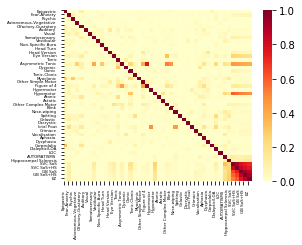

In [20]:
# new lancet theils combined:


# rearrange columns
X_HS_model = X_HS_model[[c for c in X_HS_model if c not in ['EZ', 'Hippocampal Sclerosis', 'SVC SoS', 'SVC SoS+HS', 'GB SoS', 'GB SoS+HS']] + ['Hippocampal Sclerosis', 'SVC SoS', 'SVC SoS+HS', 'GB SoS', 'GB SoS+HS', 'EZ']]


# plot
corr_svc = associations(X_HS_model, 
                          nominal_columns='all', mark_columns=False, Theils_U=True, plot=True,
                          return_results = True, 
                          savefigure=True,
                          title_auto=False, 
                       figsize=(cm2inch(10.7), cm2inch(8)))

In [25]:
len(y_EZ_gold)

126

In [27]:
matthews_corrcoef(y_EZ_gold, GB_RFECV_acc.estimator_.predict(X_gold[best_GB_fx]))

0.9176629354822471

# thumb: learning curves

In [41]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, learning_curve_score='accuracy',
                        scoring_plot = 'Score',
                        n_jobs=None, train_sizes=np.linspace(.4, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(cm2inch(10.7), cm2inch(10)))

    axes.set_title(title, fontsize=10, fontweight='bold', **csfont)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples", fontsize=10)
    axes.set_ylabel(scoring_plot, fontsize=10)

    train_sizes, train_scores, test_scores = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes, 
                       scoring=learning_curve_score,
#                        return_times=True,
                      )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
#     fit_times_mean = np.mean(fit_times, axis=1)
#     fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    
    # ali added benchmark:
    if scoring_plot=='Score':  # use rskf bootstrapping 
        axes.axhspan(0.83-0.04, 0.83+0.04, facecolor='0.5', alpha=0.1, label='Benchmark')
    else:  # assume f1_macro: use automatisms and HS f1_macros.
        axes.axhspan(0.59, 0.63, facecolor='0.5', alpha=0.1, label='Benchmark')
    
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc=4)
    
    axes.grid(b=True, which='both', axis='both')

    # Plot n_samples vs fit_times
#     axes[1].grid()
#     axes[1].plot(train_sizes, fit_times_mean, 'o-')
#     axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
#                          fit_times_mean + fit_times_std, alpha=0.1)
#     axes[1].set_xlabel("Training examples")
#     axes[1].set_ylabel("fit_times")
#     axes[1].set_title("Scalability of the model")

#     # Plot fit_time vs score
#     axes[2].grid()
#     axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
#     axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
#                          test_scores_mean + test_scores_std, alpha=0.1)
#     axes[2].set_xlabel("fit_times")
#     axes[2].set_ylabel("Score")
#     axes[2].set_title("Performance of the model")



    return plt



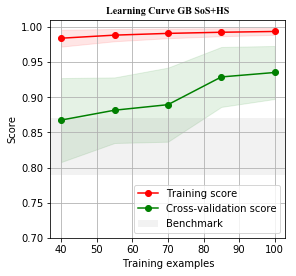

In [22]:
# now with the best features for SoS+HS
# with RFECV features, 1000 rs5f 


# estimator = GradientBoostingClassifier()
estimator = GB_HS_RFECV_acc.estimator_
cv = RepeatedStratifiedKFold(n_repeats=1000, n_splits=5, random_state=1)

# best_GB_fx = X_S_gold.columns[GB_RFECV_acc.get_support(indices=True)]
# best_GB_HS_fx = X_HS_gold.columns[GB_HS_RFECV_acc.get_support(indices=True)]


# fig, axes = plt.subplots(2, 1, figsize=(10, 15))



# title = "Learning Curves GBC SoS"
# # Cross validation with 100 iterations to get smoother mean test and train
# # score curves, each time with 20% data randomly selected as a validation set.


# plot_learning_curve(estimator, title, X_S_gold[best_GB_fx], y_EZ_gold, 
#                     axes=axes[0], 
#                     ylim=(0.7, 1.01),
#                     cv=cv, n_jobs=4)





title = r"Learning Curve GB SoS+HS"
plot_learning_curve(estimator, title, X_HS_gold[best_GB_HS_fx], y_EZ_gold, 
#                     axes=axes[1], 
                    ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)


plt.tight_layout()
# plt.savefig('D:\\Ali USB Backup\\1 PhD\\paper 1\\fixed fully\\GB Learning Curve Step 1 EZ prediction 1000rsk after RFECV best feautres.jpg', format='jpg', dpi=1000)
plt.show()

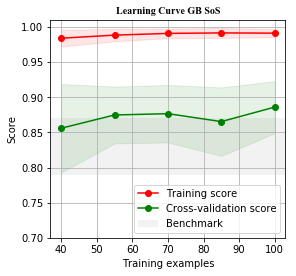

In [24]:
# now with the best features for Sos 1000 but takes long
# with RFECV features, 1000 rs5f 


# estimator = GradientBoostingClassifier()
estimator = GB_RFECV_acc.estimator_
cv = RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=1)

# best_GB_fx = X_S_gold.columns[GB_RFECV_acc.get_support(indices=True)]
# best_GB_HS_fx = X_HS_gold.columns[GB_HS_RFECV_acc.get_support(indices=True)]


# fig, axes = plt.subplots(2, 1, figsize=(10, 15))



# title = "Learning Curves GBC SoS"
# # Cross validation with 100 iterations to get smoother mean test and train
# # score curves, each time with 20% data randomly selected as a validation set.


# plot_learning_curve(estimator, title, X_S_gold[best_GB_fx], y_EZ_gold, 
#                     axes=axes[0], 
#                     ylim=(0.7, 1.01),
#                     cv=cv, n_jobs=4)





title = r"Learning Curve GB SoS"
plot_learning_curve(estimator, title, X_S_gold[best_GB_fx], y_EZ_gold, 
#                     axes=axes[1], 
                    ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)


plt.tight_layout()
# plt.savefig('D:\\Ali USB Backup\\1 PhD\\paper 1\\fixed fully\\lancet Fig 1A GBSoS ONLY Learning Curve Step 1 EZ prediction 1000rsk v2.jpg', format='jpg', dpi=1000)
plt.show()

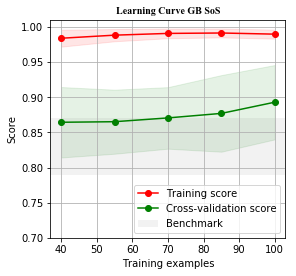

In [41]:
# now with the best features for SoS but 100 rskf which looks the same as 1000
# with RFECV features, 1000 rs5f 


# estimator = GradientBoostingClassifier()
estimator = GB_RFECV_acc.estimator_
cv = RepeatedStratifiedKFold(n_repeats=100, n_splits=5, random_state=1)

# best_GB_fx = X_S_gold.columns[GB_RFECV_acc.get_support(indices=True)]
# best_GB_HS_fx = X_HS_gold.columns[GB_HS_RFECV_acc.get_support(indices=True)]


# fig, axes = plt.subplots(2, 1, figsize=(10, 15))



# title = "Learning Curves GBC SoS"
# # Cross validation with 100 iterations to get smoother mean test and train
# # score curves, each time with 20% data randomly selected as a validation set.


# plot_learning_curve(estimator, title, X_S_gold[best_GB_fx], y_EZ_gold, 
#                     axes=axes[0], 
#                     ylim=(0.7, 1.01),
#                     cv=cv, n_jobs=4)




# title= ''
title = r"Learning Curve GB SoS"
plot_learning_curve(estimator, title, X_S_gold[best_GB_fx], y_EZ_gold, 
#                     axes=axes[1], 
                    ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)


plt.tight_layout()
# plt.savefig('D:\\Ali USB Backup\\1 PhD\\paper 1\\fixed fully\\lancet Fig 1A GBSoS ONLY Learning Curve Step 1 EZ prediction 1000rsk VECTOR EPS v2.eps', format='eps', dpi=1000)
plt.show()

# linear SVC

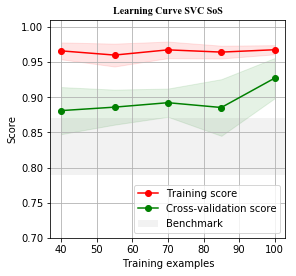

In [47]:
# now with the best features for SoS+HS
# with RFECV features, 1000 rs5f 


# estimator = GradientBoostingClassifier()
estimator = linear_RFECV_acc.estimator_
cv = RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=1)

# best_GB_fx = X_S_gold.columns[GB_RFECV_acc.get_support(indices=True)]
# best_GB_HS_fx = X_HS_gold.columns[GB_HS_RFECV_acc.get_support(indices=True)]


# fig, axes = plt.subplots(2, 1, figsize=(10, 15))



# title = "Learning Curves GBC SoS"
# # Cross validation with 100 iterations to get smoother mean test and train
# # score curves, each time with 20% data randomly selected as a validation set.


# plot_learning_curve(estimator, title, X_S_gold[best_GB_fx], y_EZ_gold, 
#                     axes=axes[0], 
#                     ylim=(0.7, 1.01),
#                     cv=cv, n_jobs=4)





title = r"Learning Curve SVC SoS"
plot_learning_curve(estimator, title, X_S_gold[best_fx_svc_lancet], y_EZ_gold, 
#                     axes=axes[1], 
                    ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)


plt.tight_layout()
# plt.savefig('D:\\Ali USB Backup\\1 PhD\\paper 1\\fixed fully\\SVC SoS Learning Curve Step 1 EZ 1000rsk after RFECV best feautres.jpg', format='jpg', dpi=1000)
plt.show()

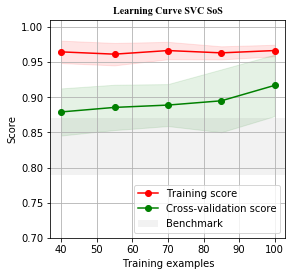

In [49]:
# now with the best features for SoS+HS
# with RFECV features, 1000 rs5f 


# estimator = GradientBoostingClassifier()
estimator = linear_RFECV_acc.estimator_
cv = RepeatedStratifiedKFold(n_repeats=1000, n_splits=5, random_state=1)

# best_GB_fx = X_S_gold.columns[GB_RFECV_acc.get_support(indices=True)]
# best_GB_HS_fx = X_HS_gold.columns[GB_HS_RFECV_acc.get_support(indices=True)]


# fig, axes = plt.subplots(2, 1, figsize=(10, 15))



# title = "Learning Curves GBC SoS"
# # Cross validation with 100 iterations to get smoother mean test and train
# # score curves, each time with 20% data randomly selected as a validation set.


# plot_learning_curve(estimator, title, X_S_gold[best_GB_fx], y_EZ_gold, 
#                     axes=axes[0], 
#                     ylim=(0.7, 1.01),
#                     cv=cv, n_jobs=4)







# title=''
title = r"Learning Curve SVC SoS"
plot_learning_curve(estimator, title, X_S_gold[best_fx_svc_lancet], y_EZ_gold, 
#                     axes=axes[1], 
                    ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)


plt.tight_layout()
plt.savefig('D:\\Ali USB Backup\\1 PhD\\paper 1\\fixed fully\\Lancet SVC SoS Learning Curve Step 1 EZ 1000rsk after RFECV best feautres.jpg', format='jpg', dpi=1000)
plt.savefig('D:\\Ali USB Backup\\1 PhD\\paper 1\\fixed fully\\Lancet SVC SoS Learning Curve Step 1 EZ 1000rsk after RFECV best feautres VECTOR.eps', format='eps', dpi=1000)

# plt.savefig('D:\\Ali USB Backup\\1 PhD\\paper 1\\fixed fully\\SVC SoS Learning Curve Step 1 EZ 1000rsk after RFECV best feautres VECTOR BLANK.eps', format='eps', dpi=1000)



plt.show()

In [ ]:
# this below cell shows using best GB feagtures in SVM
# clearly doesn't do as well as its own RFECV features

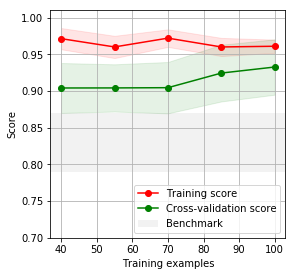

In [46]:
# now with the best features for SoS+HS
# with RFECV features, 1000 rs5f 


# estimator = GradientBoostingClassifier()
estimator = linear_HS_RFECV_acc.estimator_
cv = RepeatedStratifiedKFold(n_repeats=1000, n_splits=5, random_state=1)

# best_GB_fx = X_S_gold.columns[GB_RFECV_acc.get_support(indices=True)]
# best_GB_HS_fx = X_HS_gold.columns[GB_HS_RFECV_acc.get_support(indices=True)]


# fig, axes = plt.subplots(2, 1, figsize=(10, 15))



# title = "Learning Curves GBC SoS"
# # Cross validation with 100 iterations to get smoother mean test and train
# # score curves, each time with 20% data randomly selected as a validation set.


# plot_learning_curve(estimator, title, X_S_gold[best_GB_fx], y_EZ_gold, 
#                     axes=axes[0], 
#                     ylim=(0.7, 1.01),
#                     cv=cv, n_jobs=4)




title = r"Learning Curve SVC SoS+HS USING GB FEATURES"
plot_learning_curve(estimator, title, X_HS_gold[best_GB_HS_fx], y_EZ_gold, 
#                     axes=axes[1], 
                    ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)


plt.tight_layout()

plt.show()

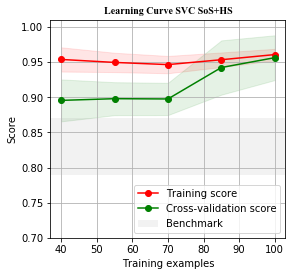

In [51]:
# now with the best features for SoS+HS
# with RFECV features, 1000 rs5f 


# estimator = GradientBoostingClassifier()
estimator = linear_HS_RFECV_acc.estimator_
cv = RepeatedStratifiedKFold(n_repeats=1000, n_splits=5, random_state=1)

# best_GB_fx = X_S_gold.columns[GB_RFECV_acc.get_support(indices=True)]
# best_GB_HS_fx = X_HS_gold.columns[GB_HS_RFECV_acc.get_support(indices=True)]


# fig, axes = plt.subplots(2, 1, figsize=(10, 15))



# title = "Learning Curves GBC SoS"
# # Cross validation with 100 iterations to get smoother mean test and train
# # score curves, each time with 20% data randomly selected as a validation set.


# plot_learning_curve(estimator, title, X_S_gold[best_GB_fx], y_EZ_gold, 
#                     axes=axes[0], 
#                     ylim=(0.7, 1.01),
#                     cv=cv, n_jobs=4)




# title =''
title = r"Learning Curve SVC SoS+HS"
plot_learning_curve(estimator, title, X_HS_gold[best_fx_svc_HS_lancet], y_EZ_gold, 
#                     axes=axes[1], 
                    ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)


plt.tight_layout()
plt.savefig('D:\\Ali USB Backup\\1 PhD\\paper 1\\fixed fully\\Lancet SVC SoS HS Learning Curve Step 1 EZ 1000rsk after RFECV best feautres.jpg', format='jpg', dpi=1000)
plt.savefig('D:\\Ali USB Backup\\1 PhD\\paper 1\\fixed fully\\Lancet SVC SoS HS Learning Curve Step 1 EZ 1000rsk after RFECV best feautres VECTOR.eps', format='eps', dpi=1000)

# plt.savefig('D:\\Ali USB Backup\\1 PhD\\paper 1\\fixed fully\\Lancet SVC SoS HS Learning Curve Step 1 EZ 1000rsk after RFECV best feautres VECTOR BLANK.eps', format='eps', dpi=1000)


plt.show()

# feature importance SVC and GB

In [25]:
classifier = linear_HS_RFECV_acc.estimator_
feature_names = best_fx_svc_HS_lancet
model = 'SVC'

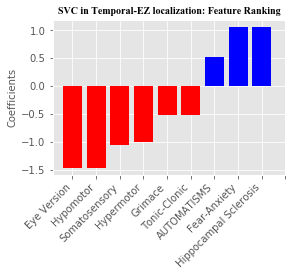

In [26]:
plt.style.use('ggplot')

plot_coefficients_all(
                        classifier=classifier,
                        feature_names=feature_names,
                        save=True,
                        model=model,
                        figsize=(10.7,10),
                        )

In [32]:
linear_HS_RFECV_acc.estimator_.n_support_

array([12, 14])

In [38]:
linear_HS_RFECV_acc.estimator_.support_vectors_.shape  # 26 by 9 (26 support vectors)

linear_HS_RFECV_acc.estimator_.support_  # indices of support vectors

array([ 21,  30,  33,  59,  74,  90,  91,  99, 101, 104, 116, 122,  15,
        16,  25,  26,  46,  49,  66,  76,  95, 106, 119, 123, 124, 125])

In [35]:
linear_HS_RFECV_acc.estimator_.support_vectors_

array([[0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 1.],
       [0.

In [41]:
# test if the indices of support vectors (.support_) on the X data returns the features in .support_vectors_:

alis_support_vectors = X_HS_gold[best_fx_svc_HS_lancet].iloc[linear_HS_RFECV_acc.estimator_.support_]
alis_support_vectors

# the answer is yes!

,Fear-Anxiety,Somatosensory,Eye Version,Tonic-Clonic,Hypermotor,Hypomotor,Grimace,Hippocampal Sclerosis,AUTOMATISMS
473,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
502,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
517,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
637,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
692,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
741,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
771,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0
775,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
783,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0


In [42]:
alis_support_vectors.sum()

Fear-Anxiety              2.0
Somatosensory             6.0
Eye Version               2.0
Tonic-Clonic             19.0
Hypermotor                1.0
Hypomotor                 2.0
Grimace                   4.0
Hippocampal Sclerosis     2.0
AUTOMATISMS               6.0
dtype: float64

In [27]:
classifier = GB_HS_RFECV_acc.estimator_
feature_names = best_GB_HS_fx
model = 'GB'

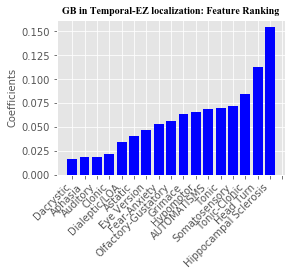

In [28]:
plt.style.use('ggplot')

plot_coefficients_all(
                        classifier=classifier,
                        feature_names=feature_names,
                        save=True,
                        model=model,
                        figsize=(10.7,10),
                        )

# test Arushi's 6-->5 cases:

In [ ]:
best_GB_fx
best_GB_HS_fx

best_fx_svc_lancet
best_fx_svc_HS_lancet

In [52]:
# so now import Arushi's cases:
# ensure deleted comments!

arushi_file = "L:\\Semiology_Arushi_Marvasti_18th_March_2020.xlsx"

arushi_cases = pd.read_excel(arushi_file, 
#                            nrows=n_rows, 
#                            usecols=usecols, 
                           header=0, 
                           index_col='arushi_case',
                           sheet_name='dataframe'
                          )

arushi_cases.dropna(how='all', axis=0, inplace=True)
arushi_cases.dropna(how='all', axis=1, inplace=True)
arushi_cases.drop(columns='EZ', inplace=True)

In [53]:
# checking to ensure the cases from arushi's aren't already included in the ground truthed EZ cases:

arushi_IDPs = list(arushi_cases.index)
print([i for i in X_HS_gold.index if i in arushi_IDPs])

# 437 is in the training set already

arushi_cases.drop(437, inplace=True)

[437]


In [54]:
# target y:

arushi_EZ = np.array([False, False, False, False, True])

In [55]:
# x:
arushi_cases#[best_GB_HS_fx]

,Epigastric,Fear-Anxiety,Psychic,Autonomous-Vegetative,Olfactory-Gustatory,Auditory,Visual,Somatosensory,Vestibular,Non-Specific Aura,...,Ictal Pout,Grimace,Vocalisation,Aphasia,Dysphasia,Corprolalia,Dialeptic/LOA,LOC,Hippocampal Sclerosis,AUTOMATISMS
arushi_case,,,,,,,,,,,,,,,,,,,,,
446.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
52.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
795.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [56]:
# predict:
GB_HS_RFECV_acc.predict(arushi_cases)



# equivalent ways:
# GB_HS_RFECV_acc.estimator_.predict(arushi_cases[best_GB_HS_fx])   # equivalent to above

# also equivalent: GB_HS_RFECV_acc.estimator_.predict(arushi_cases.loc[:,best_GB_HS_fx]) 

array([False,  True,  True,  True,  True])

In [57]:
GB_HS_RFECV_acc.score(arushi_cases, arushi_EZ)


0.4

# mariana's 8-->3 test cases

In [58]:
# so now import mariana's cases:

mariana_file = "L:\\Semiology_Mariana.xlsx"

mariana_cases = pd.read_excel(mariana_file, 
#                            nrows=n_rows, 
#                            usecols=usecols, 
                           header=0, 
                           index_col='mariana case',
                           sheet_name='DataFrame'
                          )

mariana_cases.drop(columns='EZ', inplace=True)

In [59]:
mariana_cases

,Epigastric,Fear-Anxiety,Psychic,Autonomous-Vegetative,Olfactory-Gustatory,Auditory,Visual,Somatosensory,Vestibular,Non-Specific Aura,...,Ictal Pout,Grimace,Vocalisation,Aphasia,Dysphasia,Corprolalia,Dialeptic/LOA,LOC,Hippocampal Sclerosis,AUTOMATISMS
mariana case,,,,,,,,,,,,,,,,,,,,,
114,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
121,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,1
136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
326,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
328,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
374,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [60]:
# only 214,326,374 are ESF:

mariana_cases_ESF = mariana_cases.drop([i for i in mariana_cases.index if i not in [214,326,374]], inplace=False)
mariana_cases_ESF

,Epigastric,Fear-Anxiety,Psychic,Autonomous-Vegetative,Olfactory-Gustatory,Auditory,Visual,Somatosensory,Vestibular,Non-Specific Aura,...,Ictal Pout,Grimace,Vocalisation,Aphasia,Dysphasia,Corprolalia,Dialeptic/LOA,LOC,Hippocampal Sclerosis,AUTOMATISMS
mariana case,,,,,,,,,,,,,,,,,,,,,
214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
326,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
374,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [61]:

marianna_EZ = np.array([False, True, False, False, False, False, False, False])
mariana_cases_ESF_EZ = np.array([False, False, False])

In [62]:
# moment of truth: predict above, true test set: only the second case is T Lx which mariana found had been incorrectly documented as T P Lx
# all 8 not all ESF:
GB_HS_RFECV_acc.score(mariana_cases, marianna_EZ)

0.875

In [63]:
GB_HS_RFECV_acc.score(mariana_cases_ESF, mariana_cases_ESF_EZ)

0.6666666666666666

# combined test set of 8 or 14:

In [64]:
# reload:

arushi_file = "L:\\Semiology_Arushi_Marvasti_18th_March_2020.xlsx"
arushi_cases = pd.read_excel(arushi_file, 
#                            nrows=n_rows, 
#                            usecols=usecols, 
                           header=0, 
                           index_col='arushi_case',
                           sheet_name='dataframe'
                          )
arushi_cases.dropna(how='all', axis=0, inplace=True)
arushi_cases.dropna(how='all', axis=1, inplace=True)



# so now import mariana's cases:
mariana_file = "L:\\Semiology_Mariana.xlsx"
mariana_cases = pd.read_excel(mariana_file, 
#                            nrows=n_rows, 
#                            usecols=usecols, 
                           header=0, 
                           index_col='mariana case',
                           sheet_name='DataFrame'
                          )


In [65]:
# append them together, separate x and y:

test_set_14 = arushi_cases.append(mariana_cases)
test_set_14_EZ = test_set_14['EZ']

test_set_8 = arushi_cases.drop(437).append(test_set_14.loc[[214, 326, 374],:])
test_set_8_EZ = test_set_8['EZ']

test_set_14.drop(columns='EZ', inplace=True)
test_set_8.drop(columns='EZ', inplace=True)

In [66]:
#score all 14:
GB_HS_RFECV_acc.score(test_set_14, test_set_14_EZ)

0.6428571428571429

In [67]:
# score 8:
GB_HS_RFECV_acc.score(test_set_8, test_set_8_EZ)

0.5

In [84]:
# score 8:

from sklearn.metrics import matthews_corrcoef, adjusted_mutual_info_score, mutual_info_score, normalized_mutual_info_score


matthews_corrcoef(y_pred=GB_HS_RFECV_acc.predict(test_set_8), y_true=test_set_8_EZ)



0.29277002188455997

In [85]:
normalized_mutual_info_score(labels_pred=GB_HS_RFECV_acc.predict(test_set_8), labels_true=test_set_8_EZ)

0.1282279075985308

In [86]:
adjusted_mutual_info_score(labels_pred=GB_HS_RFECV_acc.predict(test_set_8), labels_true=test_set_8_EZ)

-0.04874227744129702

In [87]:
mutual_info_score(labels_pred=GB_HS_RFECV_acc.predict(test_set_8), labels_true=test_set_8_EZ)

0.06401864654506928

In [217]:
# combined GB SoS only

HS = 'Hippocampal Sclerosis'

In [218]:
# score 14:
GB_RFECV_acc.score(test_set_14.drop(columns=HS), test_set_14_EZ.drop(columns=HS))

0.42857142857142855

In [219]:
# score 8:
GB_RFECV_acc.score(test_set_8.drop(columns=HS), test_set_8_EZ.drop(columns=HS))

0.375

In [83]:
matthews_corrcoef(y_pred=GB_RFECV_acc.predict(test_set_8.drop(columns=HS)), y_true=test_set_8_EZ)

0.2182178902359924

In [88]:
normalized_mutual_info_score(labels_pred=GB_RFECV_acc.predict(test_set_8.drop(columns=HS)), labels_true=test_set_8_EZ)

0.08440085120147742

In [ ]:
# GB SoS MCC 21.8% --> GB SoS+HS MCC = 29.3%
#        acc 38%   -->           acc = 50%
#        symm NMI 8.4% --->      sym NMI = 12.8%

In [104]:
GB_HS_RFECV_acc.predict(test_set_8)

array([False,  True,  True,  True,  True, False,  True, False])

In [ ]:
# SVC linear

In [220]:
# all 14
linear_HS_RFECV_acc.score(test_set_14, test_set_14_EZ)

0.7142857142857143

In [221]:
# score the 8:
linear_HS_RFECV_acc.score(test_set_8, test_set_8_EZ)

0.75

In [89]:
matthews_corrcoef(y_pred=linear_HS_RFECV_acc.predict(test_set_8), y_true=test_set_8_EZ)

0.4879500364742666

In [90]:
normalized_mutual_info_score(labels_pred=linear_HS_RFECV_acc.predict(test_set_8), labels_true=test_set_8_EZ)

0.27656581941381214

In [223]:
linear_RFECV_acc.score(test_set_14.drop(columns=HS), test_set_14_EZ.drop(columns=HS))

0.6428571428571429

In [224]:
linear_RFECV_acc.score(test_set_8.drop(columns=HS), test_set_8_EZ.drop(columns=HS))

0.75

In [91]:
matthews_corrcoef(y_pred=linear_RFECV_acc.predict(test_set_8.drop(columns=HS)), y_true=test_set_8_EZ)

0.4879500364742666

In [92]:
normalized_mutual_info_score(labels_pred=linear_RFECV_acc.predict(test_set_8.drop(columns=HS)), labels_true=test_set_8_EZ)

0.27656581941381214

In [ ]:
# SVC SoS MCC 48.8%  --> SoS+HS MCC = 48.8%
#         acc 75% -->        acc = 75%
#           NMI    27.7% -->          NMI = 27.7%

In [96]:
test_set_8.drop(columns=HS).iloc[1:2, linear_RFECV_acc.get_support(indices=True)]

len(linear_RFECV_acc.get_support(indices=True))

40

In [99]:
len(linear_HS_RFECV_acc.get_support(indices=True))
test_set_8.iloc[1:2, linear_HS_RFECV_acc.get_support(indices=True)]

,Fear-Anxiety,Somatosensory,Eye Version,Tonic-Clonic,Hypermotor,Hypomotor,Grimace,Hippocampal Sclerosis,AUTOMATISMS
9.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# benchmark

In [227]:
test_set_8_EZ

# therefore baseline naive: 1/8 = 0.875 ET (inv naive)

446.0    0.0
9.0      0.0
35.0     0.0
52.0     0.0
795.0    1.0
214.0    0.0
326.0    0.0
374.0    0.0
Name: EZ, dtype: float64

In [229]:
7/8

0.875

In [1]:
1/8

0.125

In [103]:
test_set_8['Hypermotor']

446.0    0.0
9.0      0.0
35.0     1.0
52.0     0.0
795.0    0.0
214.0    0.0
326.0    0.0
374.0    0.0
Name: Hypermotor, dtype: float64

In [110]:
# logistic regression performance:

LR_RFECV_acc.score(test_set_8.drop(columns=HS), test_set_8_EZ)

0.5

In [111]:
LR_HS_RFECV_acc.score(test_set_8, test_set_8_EZ)

0.5

In [112]:
matthews_corrcoef(y_pred=LR_RFECV_acc.predict(test_set_8.drop(columns=HS)), y_true=test_set_8_EZ)

0.29277002188455997

In [114]:
matthews_corrcoef(y_pred=LR_HS_RFECV_acc.predict(test_set_8), y_true=test_set_8_EZ)

0.29277002188455997

In [279]:
(X_gold.sum() == 0 ).sum()

0

# univariate benchmarskf ro test set 8:

In [311]:
from Epilepsy_Surgery_Project.Stats.performance_metrics import performance_metrics

In [312]:
performance_metrics(test_set_8, HS, test_set_8_EZ)

variable being tested:  Hippocampal Sclerosis  target:  EZ
integrity check : pass
OR_fisher nan
OR_chi nan
OR_manual nan
SENS 0.0
SPEC 1.0
PPV nan
NPV 0.875
F1_MACRO nan
BAL_ACC 0.5
ACCURACY_simple 0.875
Matthews Correlation Coefficient 0.0
Theils U 1.4733425557411886e-16
Fisher p-value 1.0


In [316]:
performance_metrics(test_set_8, 'AUTOMATISMS', test_set_8_EZ)

variable being tested:  Fear-Anxiety  target:  EZ
integrity check : pass
OR_fisher nan
OR_chi nan
OR_manual nan
SENS 0.0
SPEC 1.0
PPV nan
NPV 0.875
F1_MACRO nan
BAL_ACC 0.5
ACCURACY_simple 0.875
Matthews Correlation Coefficient 0.0
Theils U 1.4733425557411886e-16
Fisher p-value 1.0


In [322]:
test_set_8

,Epigastric,Fear-Anxiety,Psychic,Autonomous-Vegetative,Olfactory-Gustatory,Auditory,Visual,Somatosensory,Vestibular,Non-Specific Aura,...,Grimace,Vocalisation,Aphasia,Dysphasia,Corprolalia,Dialeptic/LOA,LOC,Hippocampal Sclerosis,AUTOMATISMS,EZ
446.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
52.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
795.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
214.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
326.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
374.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Karan PDFs : test (incomplete features)

In [128]:

Karan_test = pd.read_csv(r'L:\PDF\A to H patient DF - Greg method, without regex')

In [129]:
Karan_test.shape  # 860 PDFs (MATLAB scripts picked up as duplicated)

(542, 64)

In [132]:
y_all = Karan_test['Entirely Seizure-Free']
# x_all

In [133]:
Karan_ESF = Karan_test.loc[Karan_test['Entirely Seizure-Free']==1] # 30 ESF, some are duplicated


Karan_ESF.MRN1.duplicated()

5      False
13     False
36     False
39     False
50     False
56     False
107    False
126    False
141    False
152    False
178    False
184    False
185     True
218    False
246    False
252    False
257    False
261    False
271     True
272     True
273    False
311    False
366    False
383    False
431    False
453    False
506    False
512     True
513     True
529    False
Name: MRN1, dtype: bool

In [134]:
x_ESF_xduplicated = Karan_ESF.loc[~Karan_ESF.MRN1.duplicated()]



In [135]:
x_ESF_xduplicated['EZ'] = False
x_ESF_xduplicated.loc[(x_ESF_xduplicated['OP Type'] == 'T Lx'), 'EZ'] = True
x_ESF_xduplicated.loc[(x_ESF_xduplicated['OP Type'] == 'T Lesx'), 'EZ'] = True

In [136]:
x_ESF_xduplicated['OP Type']

5        P Lx
13       T Lx
36       T Lx
39       T Lx
50       T Lx
56       F Lx
107      T Lx
126      T Lx
141    T Lesx
152      T Lx
178      T Lx
184      P Lx
218    T Lesx
246      T Lx
252      T Lx
257      T Lx
261      F Lx
273      F Lx
311      T Lx
366      T Lx
383      T Lx
431    T Lesx
453      T Lx
506      T Lx
529      T Lx
Name: OP Type, dtype: object

In [137]:
y_Karan = x_ESF_xduplicated['EZ']

In [138]:
X_Karan = x_ESF_xduplicated.iloc[:, 13:-1]

In [139]:
X_Karan.fillna(0, inplace=True)

In [140]:
X_Karan.drop(columns=HS).shape

(25, 49)

In [141]:
len(X_Karan.drop(columns=HS).columns)

49

In [142]:
train_set_not_seen_features = ['Fencing', 'Lower Limb Automatism', 'Pallilalia', 'Aphemia', 'Drinking', 'Cough', 'Whistling']
train_set_not_seen_features = [i for i in train_set_not_seen_features if i in X_Karan.columns]
X_Karan.drop(columns=train_set_not_seen_features, inplace=True)

In [143]:
X_Karan.columns

Index(['Epigastric', 'Fear-Anxiety', 'Psychic', 'Autonomous-Vegetative',
       'Olfactory-Gustatory', 'Auditory', 'Visual', 'Somatosensory',
       'Vestibular', 'Non-Specific Aura', 'Head Turn', 'Head Version',
       'Eye Version', 'Tonic', 'Asymmetric Tonic', 'Dystonic', 'Clonic',
       'Tonic-Clonic', 'Myoclonic', 'Other Simple Motor', 'Figure of 4',
       'Hypermotor', 'Hypomotor', 'Atonic', 'Astatic', 'Other Complex Motor',
       'Oral Automatisms', 'Upper Limb Automatism', 'Blink', 'Nose-wiping',
       'Spitting', 'Gelastic', 'Dacrystic', 'Ictal Pout', 'Grimace',
       'Other Automatism', 'Vocalisation', 'Aphasia', 'Dysphasia',
       'Corprolalia', 'Dialeptic/LOA', 'LOC', 'Hippocampal Sclerosis'],
      dtype='object')

In [144]:
X_Karan['AUTOMATISMS'] = False

X_Karan.loc[X_Karan['Oral Automatisms']==True, 'AUTOMATISMS'] = True
X_Karan.loc[X_Karan['Upper Limb Automatism']==True, 'AUTOMATISMS'] = True#
X_Karan.loc[X_Karan['Other Automatism']==True, 'AUTOMATISMS'] = True


X_Karan.drop(columns=['Oral Automatisms', 'Upper Limb Automatism', 'Other Automatism'], inplace=True)

In [145]:
X_Karan.shape

(25, 41)

In [146]:
y_Karan.sum()/y_Karan.count()

0.8

In [147]:
GB_RFECV_acc.score(X_Karan.drop(columns=HS), y_Karan)

0.84

In [148]:
GB_HS_RFECV_acc.score(X_Karan, y_Karan)

0.8

In [149]:
linear_RFECV_acc.score(X_Karan.drop(columns=HS), y_Karan)

0.8

In [150]:
linear_HS_RFECV_acc.score(X_Karan, y_Karan)

0.84

# Karan PDFs: the real deal

In [281]:

Karan_test_version1_not_searched_the_description = pd.read_csv(r'L:\PDF\fullAnonDF.csv', 
#                          index_col='IDP',
                        )



Karan_test = pd.read_csv(r'L:\PDF\fullAnonDF_vs2.csv',   # Karan: "133 extra features found across the 5000 files"
#                          index_col='IDP',              # 32 features were entirely zero
                        )



Karan_test = pd.read_csv(r'L:\PDF\fullAnonDF_v3.csv',   # Karan: as vs2 but corrected OR features
#                          index_col='IDP',             # # 19 features were entirely zero
                        )

In [282]:
Karan_test.head()


# problems:
# 1. too few automatisms (none of oral, LL, UL)
# 2. AUTOMATISMS does not equal True when other automatisms is True - this is a mistake.

,Unnamed: 0,IDP,Had surgery,OP Date,OP Type,Side,IC,Entirely Seizure-Free,pdfSequenceArray,mlSequenceArray,...,Aphasia,Dysphasia,Pallilalia,Aphemia,Corprolalia,Dialeptic/LOA,LOC,EZ,AUTOMATISMS,Hippocampal Sclerosis
0,0,1500,False,NaN,NaN,NaN,NaN,NaN,"[[60, 55]]","[[49, 17]]",...,False,False,False,False,False,True,False,False,True,True
1,1,1501,False,NaN,NaN,NaN,NaN,NaN,"[[3, 50]]","[[7, 17]]",...,False,False,False,False,False,False,False,False,False,False
2,2,1502,False,NaN,NaN,NaN,NaN,NaN,"[[19, 17, 20], [55]]","[[9, 2, 46], [17]]",...,False,False,False,False,False,True,False,False,False,False
3,3,1503,False,NaN,NaN,NaN,NaN,NaN,"[[17, 15, 16, 20, 60], [62], [20]]","[[2, 4, 4, 46, 49], [26], [46]]",...,False,False,False,False,False,True,False,False,True,True
4,4,1504,False,NaN,NaN,NaN,NaN,NaN,"[[60], [37]]","[[49], [13]]",...,False,False,False,False,False,False,False,False,True,True


In [283]:
# 1. get the ESF
Karan_ESF= Karan_test.loc[Karan_test[ESF]==True]
Karan_ESF.shape  # 86

(86, 61)

In [284]:
# 2. check for duplicates, remove the last duplicates
print(Karan_ESF.IDP.nunique())
Karan_ESF.loc[Karan_ESF['IDP'].duplicated()]
Karan_ESF_xduplicated = Karan_ESF.drop(index=Karan_ESF.loc[Karan_ESF['IDP'].duplicated()].index, axis=0)
# Karan_ESF.loc[~Karan_ESF['IDP'].duplicated()  # equivalent
Karan_ESF_xduplicated.shape

67


(67, 61)

In [285]:
(Karan_ESF.drop(index=Karan_ESF.loc[Karan_ESF['IDP'].duplicated()].index, axis=0).all() == Karan_ESF.loc[~Karan_ESF['IDP'].duplicated()].all()).all()

True

In [286]:
# 3. Remove Hx/CCx in OP Type

Karan_ESF_xduplicated = Karan_ESF_xduplicated.drop(index=Karan_ESF_xduplicated.loc[Karan_ESF_xduplicated['OP Type']=='Hx'].index)
Karan_ESF_xduplicated.shape

(66, 61)

In [287]:
# 4. Set EZ target for predictions

Karan_ESF_xduplicated.loc[(Karan_ESF_xduplicated['OP Type'] == 'T Lx'), 'EZ'] = True
Karan_ESF_xduplicated.loc[(Karan_ESF_xduplicated['OP Type'] == 'T Lesx'), 'EZ'] = True

y = Karan_ESF_xduplicated['EZ']

In [288]:
# 5.1  merge AUTOMATISMS and remove others
Karan_ESF_xduplicated['AUTOMATISMS'] = False

Karan_ESF_xduplicated.loc[Karan_ESF_xduplicated['Oral Automatisms']==True, 'AUTOMATISMS'] = True
Karan_ESF_xduplicated.loc[Karan_ESF_xduplicated['Upper Limb Automatism']==True, 'AUTOMATISMS'] = True#
Karan_ESF_xduplicated.loc[Karan_ESF_xduplicated['Other Automatism']==True, 'AUTOMATISMS'] = True
Karan_ESF_xduplicated.loc[Karan_ESF_xduplicated['Lower Limb Automatism']==True, 'AUTOMATISMS'] = True

Karan_ESF_xduplicated.drop(columns=['Oral Automatisms', 'Upper Limb Automatism', 'Other Automatism', 'Lower Limb Automatism'], inplace=True)


In [289]:
# 5.2 remove unused features in training set (no occurence in training set)
train_set_not_seen_features = ['Fencing', 'Lower Limb Automatism', 'Pallilalia', 'Aphemia', 'Drinking', 'Cough', 'Whistling']
train_set_not_seen_features = [i for i in train_set_not_seen_features if i in Karan_ESF_xduplicated.columns]
Karan_ESF_xduplicated.drop(columns=train_set_not_seen_features, inplace=True)


In [290]:
# 6. Set X as only subset of features of above:

if Karan_ESF_xduplicated.columns[9] == 'mlSequenceArray':
    X = Karan_ESF_xduplicated.iloc[:, 10:]
elif Karan_ESF_xduplicated.columns[9] == 'Epigastric':
    X = Karan_ESF_xduplicated.iloc[:, 9:]
# X.drop(columns=HS, inplace=True)   # wil drop later on the fly
X.drop(columns='EZ', inplace=True)
X.shape

(66, 41)

In [291]:

X.head()  # for version2, need to start from 10

,Epigastric,Fear-Anxiety,Psychic,Autonomous-Vegetative,Olfactory-Gustatory,Auditory,Visual,Somatosensory,Vestibular,Non-Specific Aura,...,Ictal Pout,Grimace,Vocalisation,Aphasia,Dysphasia,Corprolalia,Dialeptic/LOA,LOC,AUTOMATISMS,Hippocampal Sclerosis
9,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
25,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
58,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
69,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [292]:
(X.sum() == 0).sum()

19

In [296]:
X.sum()

Epigastric               14
Fear-Anxiety              0
Psychic                  18
Autonomous-Vegetative     7
Olfactory-Gustatory       3
Auditory                  1
Visual                    2
Somatosensory             2
Vestibular                1
Non-Specific Aura        14
Head Turn                 0
Head Version              5
Eye Version               0
Tonic                     4
Asymmetric Tonic          2
Dystonic                  0
Clonic                    4
Tonic-Clonic             24
Myoclonic                 0
Other Simple Motor        0
Figure of 4               0
Hypermotor                1
Hypomotor                 3
Atonic                    2
Astatic                   0
Other Complex Motor      10
Blink                     0
Nose-wiping               0
Spitting                  0
Gelastic                  0
Dacrystic                 0
Ictal Pout                0
Grimace                   0
Vocalisation              0
Aphasia                   3
Dysphasia           

In [304]:
(X_gold.sum() *(66/126)).astype(int)

Epigastric               14
Fear-Anxiety             19
Psychic                  12
Autonomous-Vegetative    13
Olfactory-Gustatory      29
Auditory                  2
Visual                    1
Somatosensory             6
Vestibular                3
Non-Specific Aura        11
Head Turn                15
Head Version              5
Eye Version               1
Tonic                    24
Asymmetric Tonic          0
Dystonic                  5
Clonic                   15
Tonic-Clonic             44
Myoclonic                 0
Other Simple Motor        7
Figure of 4               1
Hypermotor                4
Hypomotor                 1
Atonic                    1
Astatic                   7
Other Complex Motor       3
Blink                     4
Nose-wiping               5
Spitting                  0
Gelastic                  2
Dacrystic                 4
Ictal Pout                0
Grimace                   5
Vocalisation              6
Aphasia                  24
Dysphasia           

In [293]:
# 7. Naive Benchmark:
y.sum()/y.count()

0.8181818181818182

In [269]:
# 8. GB # version 2

GB_RFECV_acc.score(X.drop(columns=HS), y), GB_HS_RFECV_acc.score(X, y)

(0.8181818181818182, 0.8333333333333334)

In [294]:
# 8. GB # version 3

GB_RFECV_acc.score(X.drop(columns=HS), y), GB_HS_RFECV_acc.score(X, y)

(0.8333333333333334, 0.8333333333333334)

In [227]:
# 9. SVC(kernel=linear)  # version 1

linear_RFECV_acc.score(X.drop(columns=HS), y), linear_HS_RFECV_acc.score(X, y)

(0.8181818181818182, 0.8484848484848485)

In [270]:
# 9. SVC(kernel=linear)  # version 2

linear_RFECV_acc.score(X.drop(columns=HS), y), linear_HS_RFECV_acc.score(X, y)

(0.8181818181818182, 0.8484848484848485)

In [295]:
# 9. SVC(kernel=linear)  # version 3

linear_RFECV_acc.score(X.drop(columns=HS), y), linear_HS_RFECV_acc.score(X, y)

(0.8181818181818182, 0.8484848484848485)